<center><img src="https://i.postimg.cc/1R2d17XR/logo-800-47024e2aeaaa8651c172ba883264dd43.png" /></center>


<h1><center> Những yếu tố dẫn đến chiến thắng </center></h1>


# Mục lục

- [<font size=4>1. Import Libraries</font>](#1)
- [<font size=4>2. Giới thiệu - thông tin về dataset</font>](#2)
- [<font size=4>3. Trực quan hóa dữ liệu</font>](#3)
- [<font size=4>4. Standard Scaler</font>](#4)
- [<font size=4>5. PCA (Principle Component Analysis)</font>](#5)
- [<font size=4>6. Modeling</font>](#6)
- [<font size=4>7. Tối ưu tham số cho model</font>](#7)
- [<font size=4>8. Đánh giá mô hình - ROC_AUC</font>](#8)
- [<font size=4>9. Kết luận</font>](#9)


In [3]:
# Access to google drive
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


# Import Libraries <a name="1"></a>


In [51]:
# Libraries thao tác với dữ liệu
import pandas as pd
import numpy as np

# Libraries trực quan hóa dữ liệu
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries cho model
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Libraries đánh giá model
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.feature_selection import SelectFromModel

# Libraries cho tiền xử lí dữ liệu
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

In [95]:
# Get data
df = pd.read_csv('high_diamond_ranked_10min.csv')


In [113]:
df['blueWardsPlaced'].valu

Int64Index([16, 15, 17, 14, 18, 13, 19, 12, 20, 11, 21, 22, 38, 23, 10, 39, 37,
            41, 40, 36, 24, 35, 34, 26, 42, 25,  9, 43, 30, 33, 44, 27, 53, 48,
            46, 32, 29, 31, 28, 57, 54, 45, 50, 51, 52, 56, 58,  8, 47, 49, 60,
            55, 59, 64, 73, 63, 76, 66, 68, 75, 70, 61, 69, 65, 74, 71, 72, 67,
             7, 62,  5],
           dtype='int64')

In [114]:
df['redWardsPlaced'].value_counts().index

Int64Index([16, 15, 17, 14, 18, 13, 19, 12, 20, 11, 21, 37, 22, 39, 38, 10, 36,
            23, 40, 24, 41, 35, 25, 34, 42, 33,  9, 26, 29, 43, 44, 28, 31, 51,
            30, 56, 55, 48, 45, 27, 32, 49, 46, 47, 50, 52, 53, 59, 62, 61, 58,
            54, 60, 57,  8, 74, 77, 72, 69, 75, 67, 70,  7, 66, 68, 63, 76, 65,
            64, 71, 73],
           dtype='int64')

# Giới thiệu - thông tin về dataset <a name="2"></a>


In [6]:
# Thông tin về dữ liệu
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [96]:
# Loại bỏ thuộc tính không ảnh hưởng đến target (gameId)
df.drop(['gameId'], axis=1, inplace=True)


# Trực quan hóa dữ liệu <a name="3"></a>


- Biểu đồ thể hiện lượng label


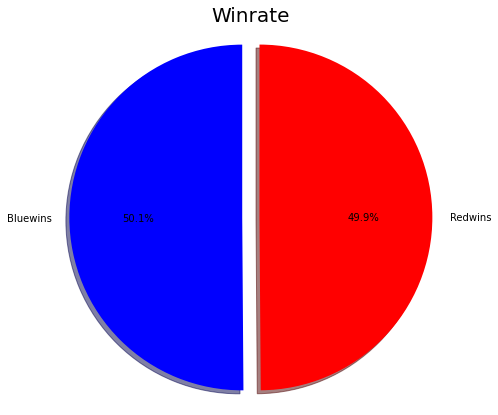

In [48]:
labels = 'Bluewins', 'Redwins'
sizes = [df.blueWins[df['blueWins'] == 1].count(
), df.blueWins[df['blueWins'] == 0].count()]
colors = ['b', 'r']
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')
plt.title("Winrate", size=20)
plt.show()


- Mối quan hệ giữa các đặc trưng ban đầu của dữ liệu


<AxesSubplot:>

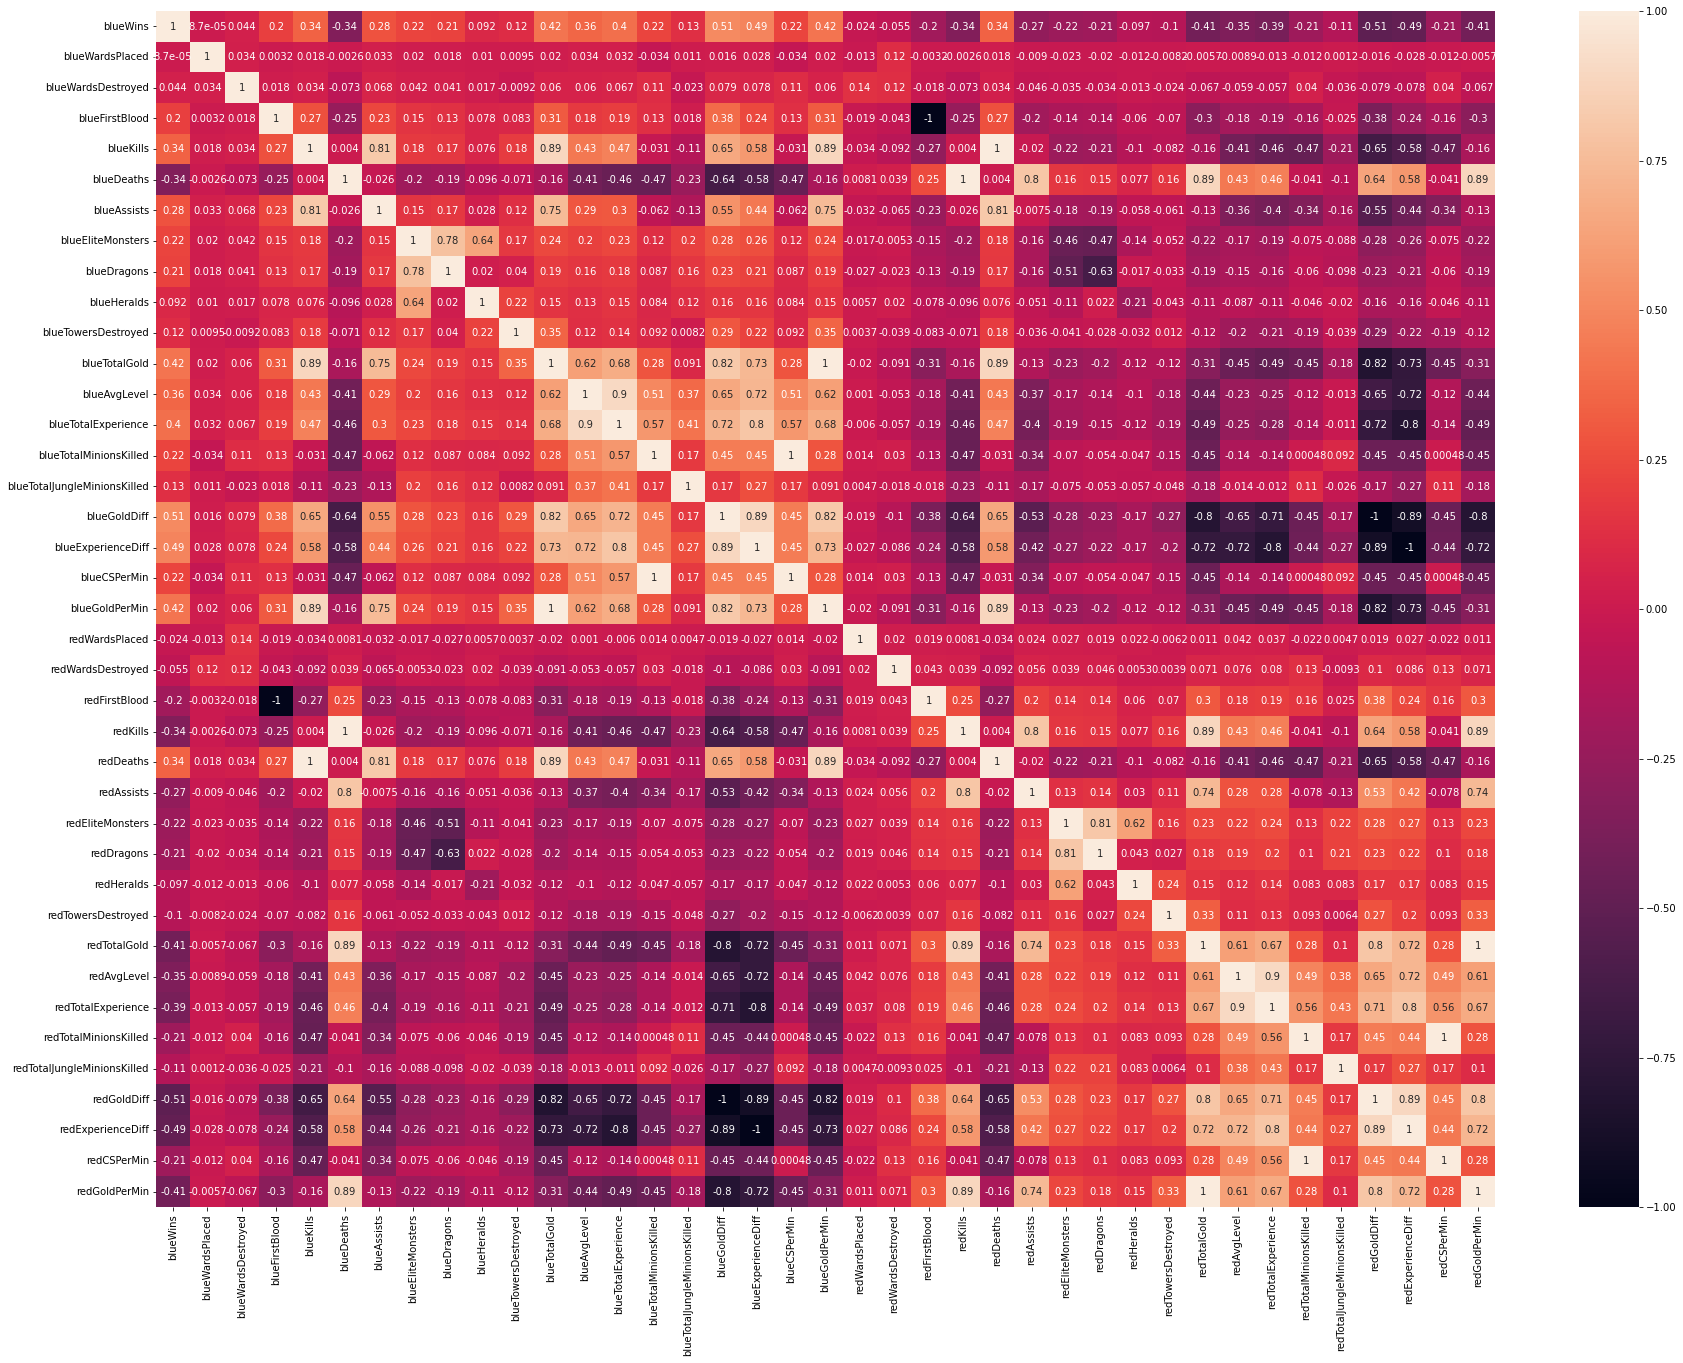

In [66]:
plt.figure(figsize=(30, 22))
sns.heatmap(df.corr(), annot=True)


In [98]:
df.drop(['redKills', 'redDeaths', 'blueCSPerMin', 'blueGoldPerMin',
'redCSPerMin', 'redGoldPerMin', 'redGoldDiff', 'redExperienceDiff', 'redFirstBlood','blueTowersDestroyed','redTowersDestroyed'], axis=1,inplace=True)

- Nhìn đồ thị heatmap có một vài thuộc tính có hệ số tương quan theo trị tuyệt dối bằng 1, nghĩa là 1 biến có ý nghĩa giải thích cho biến kia, từ đó làm giảm hiệu suất của mô hình dự đoán, nên cần loại bỏ.


In [99]:
from scipy import stats
df=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [69]:
df['blueTowersDestroyed'].value_counts()

0    7990
Name: blueTowersDestroyed, dtype: int64

In [100]:
X = df.drop(['blueWins'],axis=1)
y = df['blueWins']


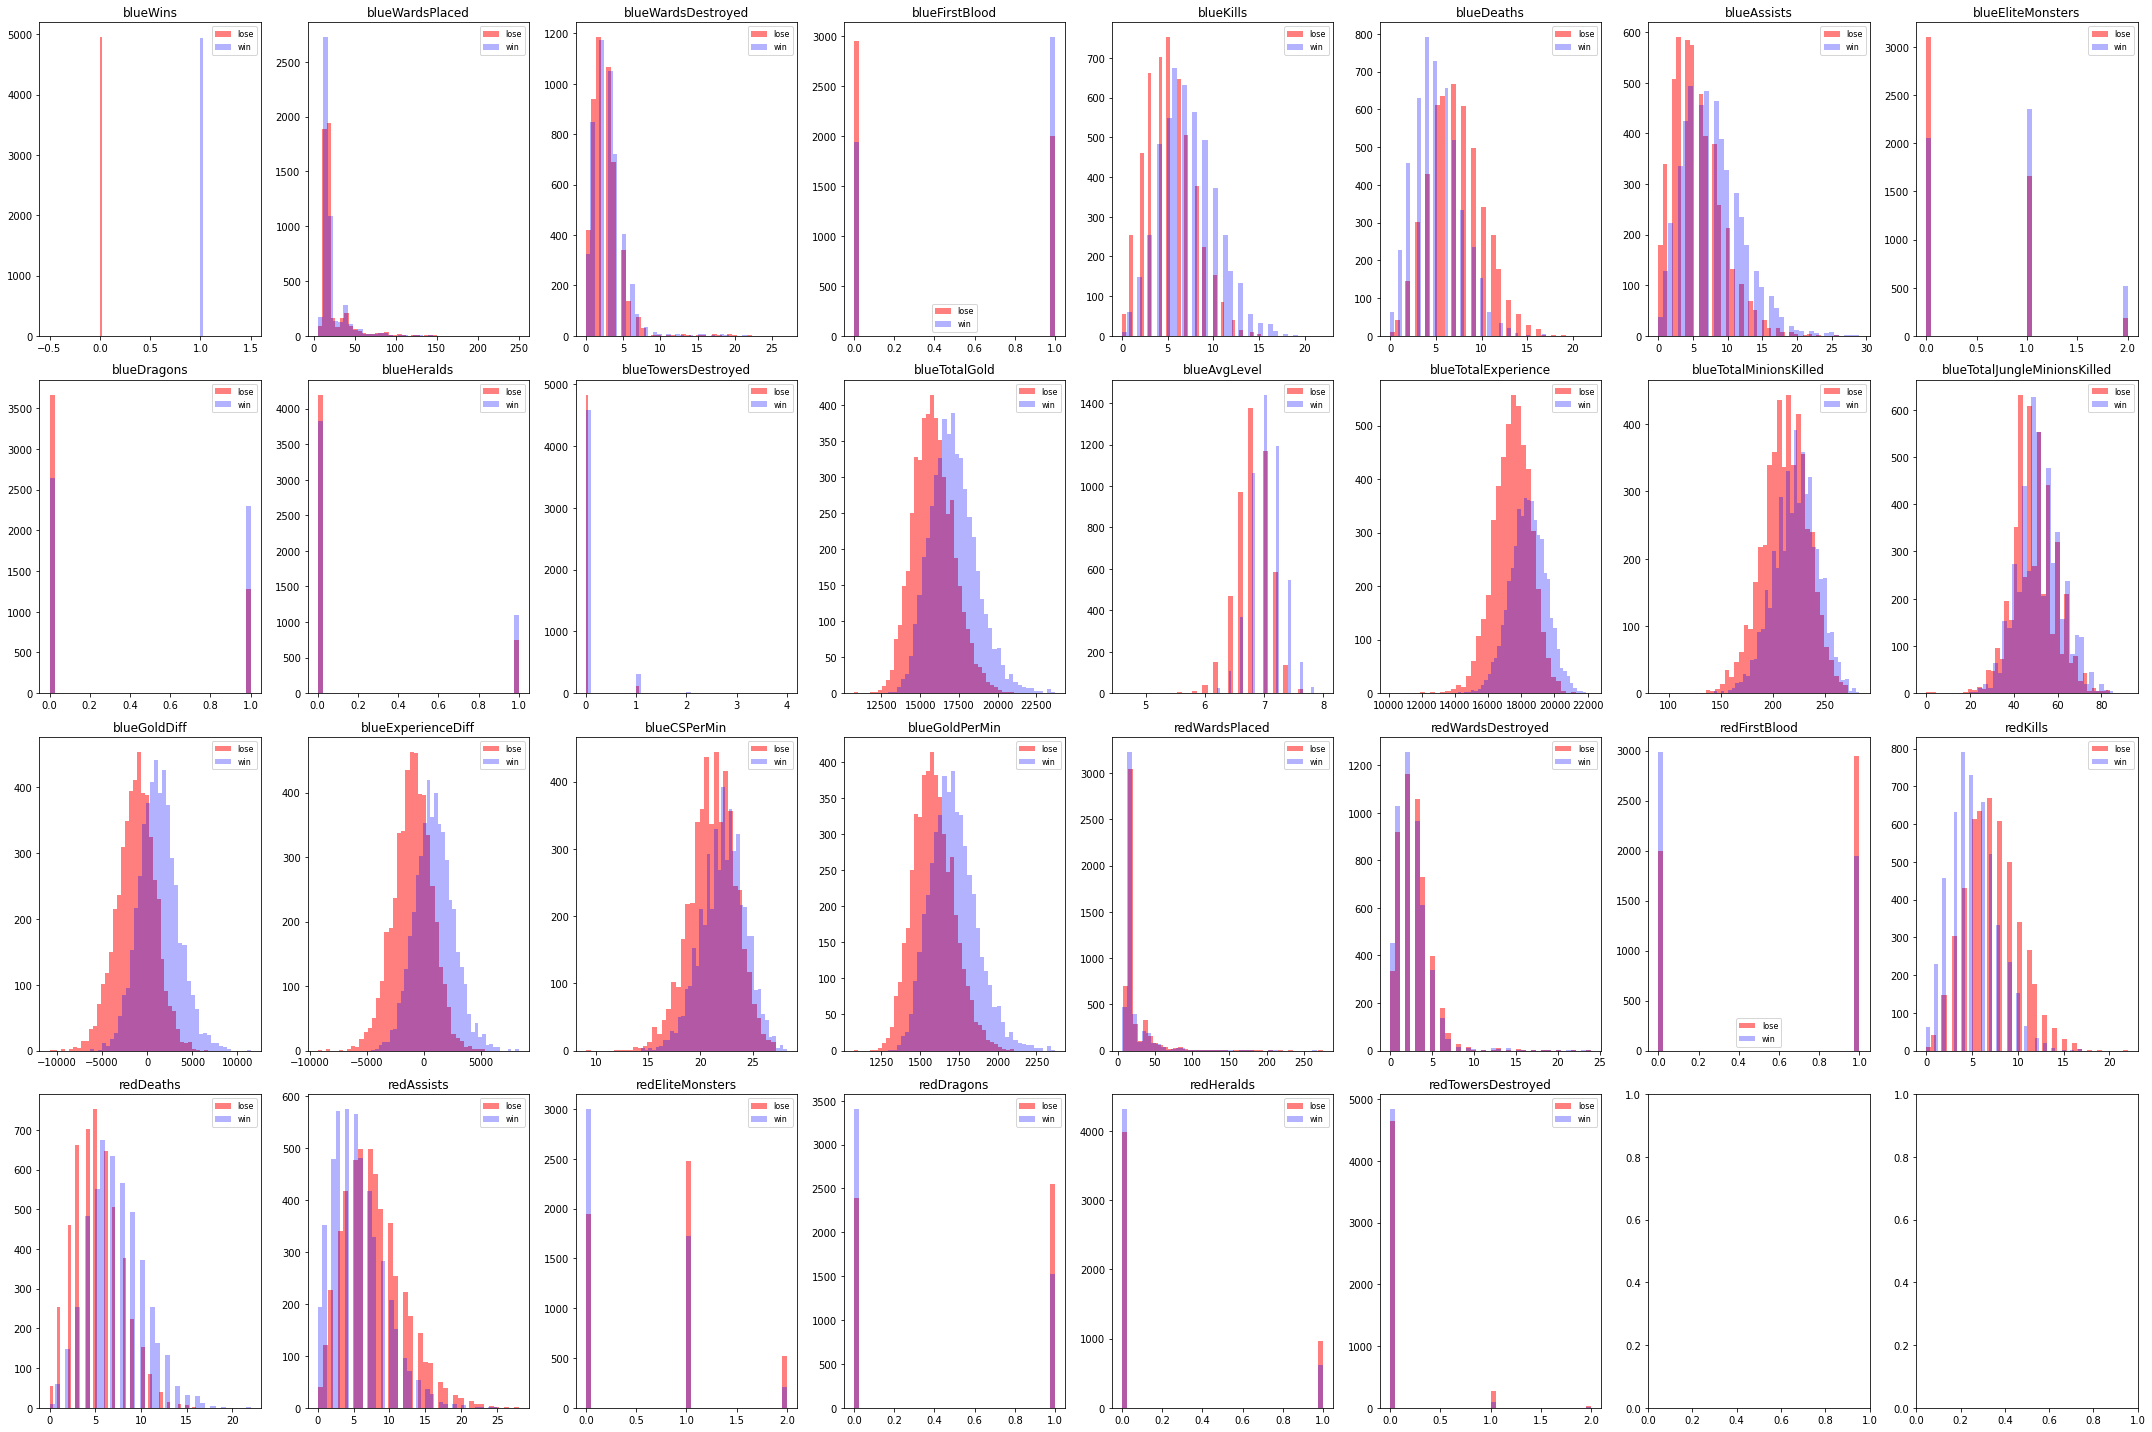

In [11]:
_, axes = plt.subplots(4, 8, figsize=(30, 20))
lose = df[df['blueWins'] == 0]
win = df[df['blueWins'] == 1]
ax = axes.ravel()                     # flatten the 2D array
for i in range(30):                   # for each of the 30 features
    bins = 40
    # ---plot histogram for each feature---
    ax[i].hist(lose.iloc[:, i], bins=bins, color='r', alpha=.5)
    ax[i].hist(win.iloc[:, i], bins=bins, color='b', alpha=0.3)
    # ---set the title---
    ax[i].set_title(df.columns[i], fontsize=12)
    # ---display the legend---
    ax[i].legend(['lose', 'win'], loc='best', fontsize=8)

plt.tight_layout()
plt.show()


**Nhận xét**: \

- Nhìn vào đồ thị Target value(BlueWins) đã được balance
- Các thuộc tính liên tục như GoldDiff, ToTalGold, GoldPerMin, ExperienceDiff, TotalExperience, TotalMinionsKilled, TotalJungleMinionsKilled, CSPerMin đồ thị có dạng theo phân phối chuẩn với mỗi target


# Standard Scaler <a name="4"></a>


- Bước này quan trọng cho dữ liệu đầu vào cho PCA


In [84]:
numerical_columns = X.drop(['blueFirstBlood', 'blueDragons', 'blueHeralds','redDragons','redHeralds'], axis=1).columns.to_list()
categorical_columns = ['blueFirstBlood', 'blueDragons', 'blueHeralds','redDragons','redHeralds']
numerical_preprocessor = StandardScaler()


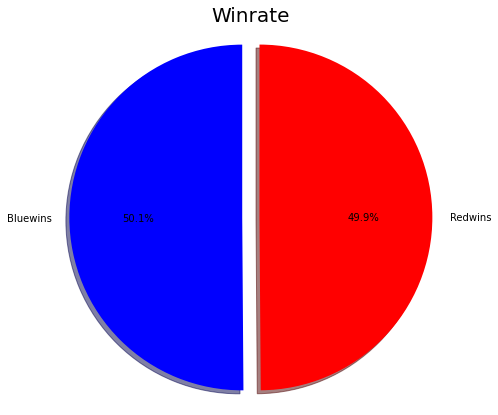

In [27]:
labels = 'Bluewins', 'Redwins'
sizes = [df.blueWins[df['blueWins'] == 1].count(), df.blueWins[df['blueWins'] == 0].count()]
colors = ['b','r']
explode = (0,0.1)
fig1,ax1 = plt.subplots(figsize = (7,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors = colors)
ax1.axis('equal')
plt.title("Winrate", size = 20)
plt.show()

In [101]:
numerical_columns = X.drop(
    ['blueFirstBlood', 'blueDragons', 'blueHeralds','redDragons','redHeralds'], axis=1).columns.to_list()
# Biến phân loại
categorical_columns = ['blueFirstBlood', 'blueDragons', 'blueHeralds','redDragons','redHeralds']
# Preprocessor cho biến liên tục 
numerical_preprocessor = StandardScaler()
ct = ColumnTransformer([
    ('standard_scaler', numerical_preprocessor, numerical_columns)],
    remainder="passthrough")
X_scaled=ct.fit_transform(X)

In [102]:
X_scaled.shape

(8635, 27)

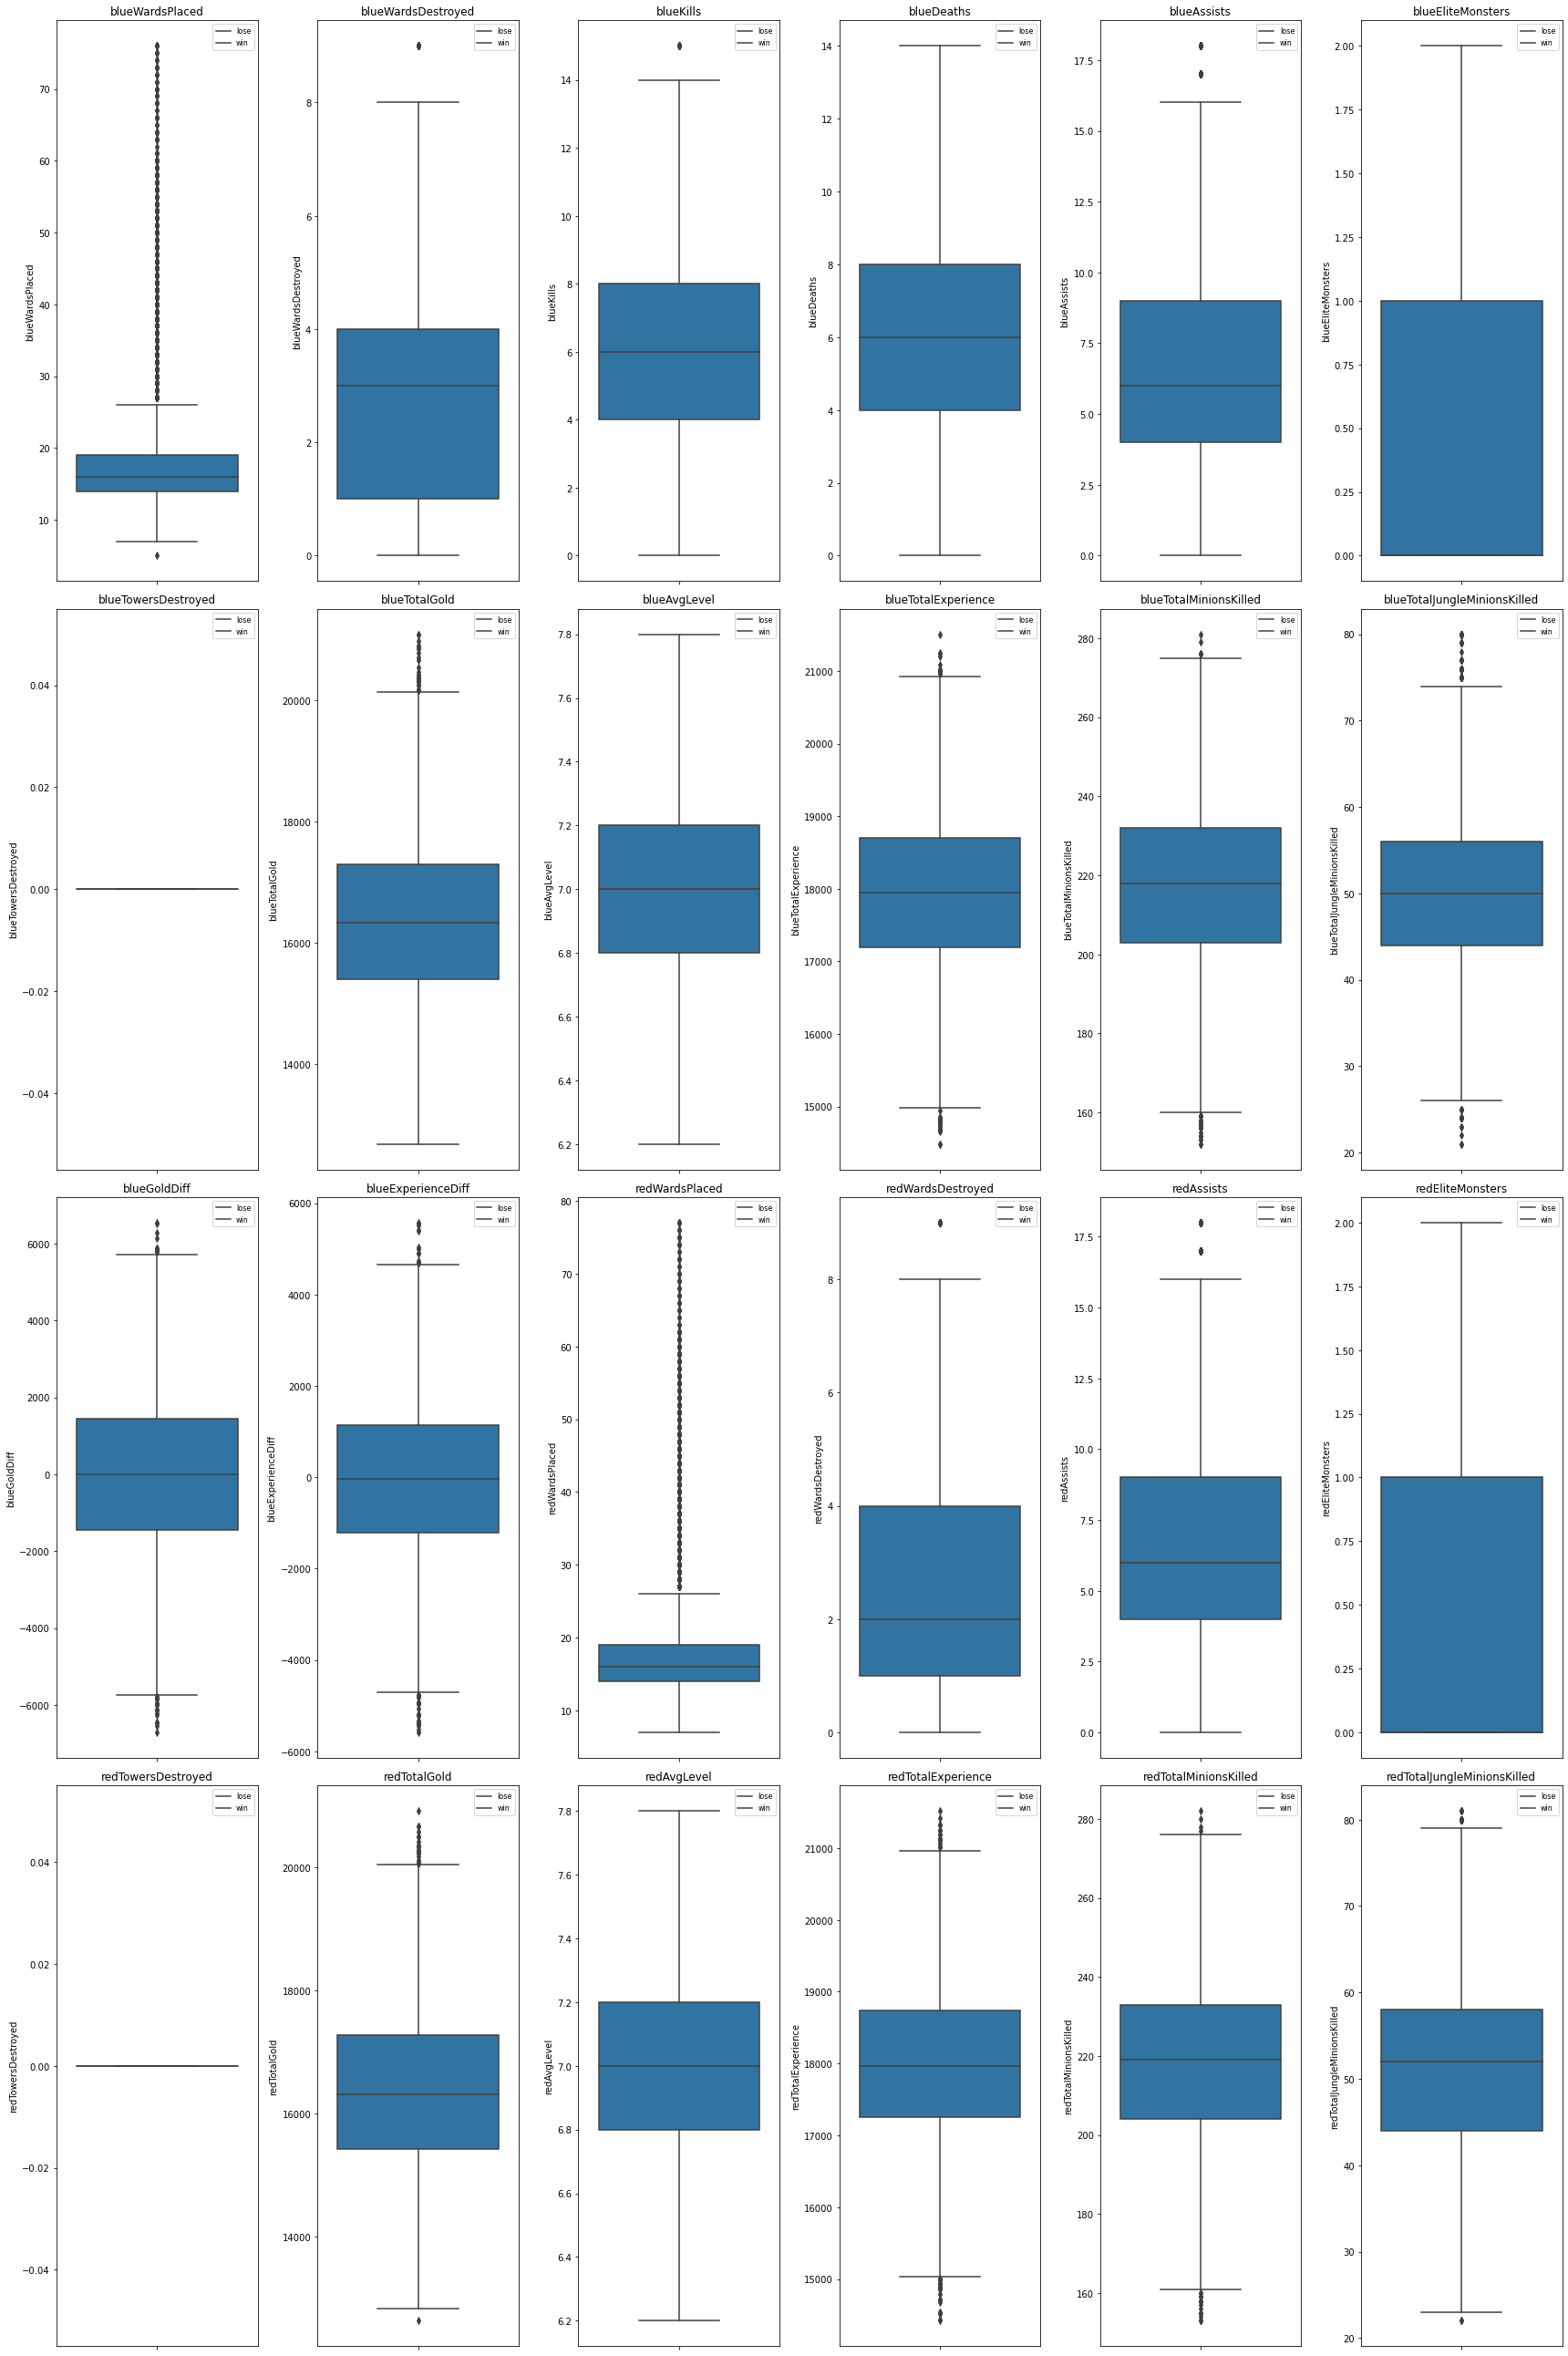

In [19]:
_, axes = plt.subplots(4,6, figsize=(24, 36))
df1 = df.loc[:,numerical_columns]
ax = axes.ravel()                                             # flatten the 2D array
for i in range(24):                   # for each of the 10 features
    plt.sca(ax[i])
    #---plot histogram for each feature---
    sns.boxplot(y=numerical_columns[i],data = df1)
    # sns.boxplot(y=numerical_columns[i],data = df1)
    #---set the title---
    ax[i].set_title(numerical_columns[i], fontsize=12)
    #---display the legend---
    ax[i].legend(['lose','win'], loc='best', fontsize=8)

plt.tight_layout()
plt.show()

In [26]:
df['blueWardsPlaced'].value_counts().index

Int64Index([16, 15, 17, 14, 18, 13, 19, 12, 20, 11, 21, 22, 38, 23, 10, 39, 37,
            41, 40, 24, 36, 35, 34, 26, 42, 25, 43, 30, 44, 27, 33,  9, 53, 46,
            48, 32, 29, 31, 28, 54, 57, 51, 50, 45, 56, 58, 52,  8, 47, 60, 49,
            55, 59, 63, 64, 73, 66, 76, 70, 75, 68, 61, 69, 72, 74, 71, 67, 65,
            62,  7,  5],
           dtype='int64')

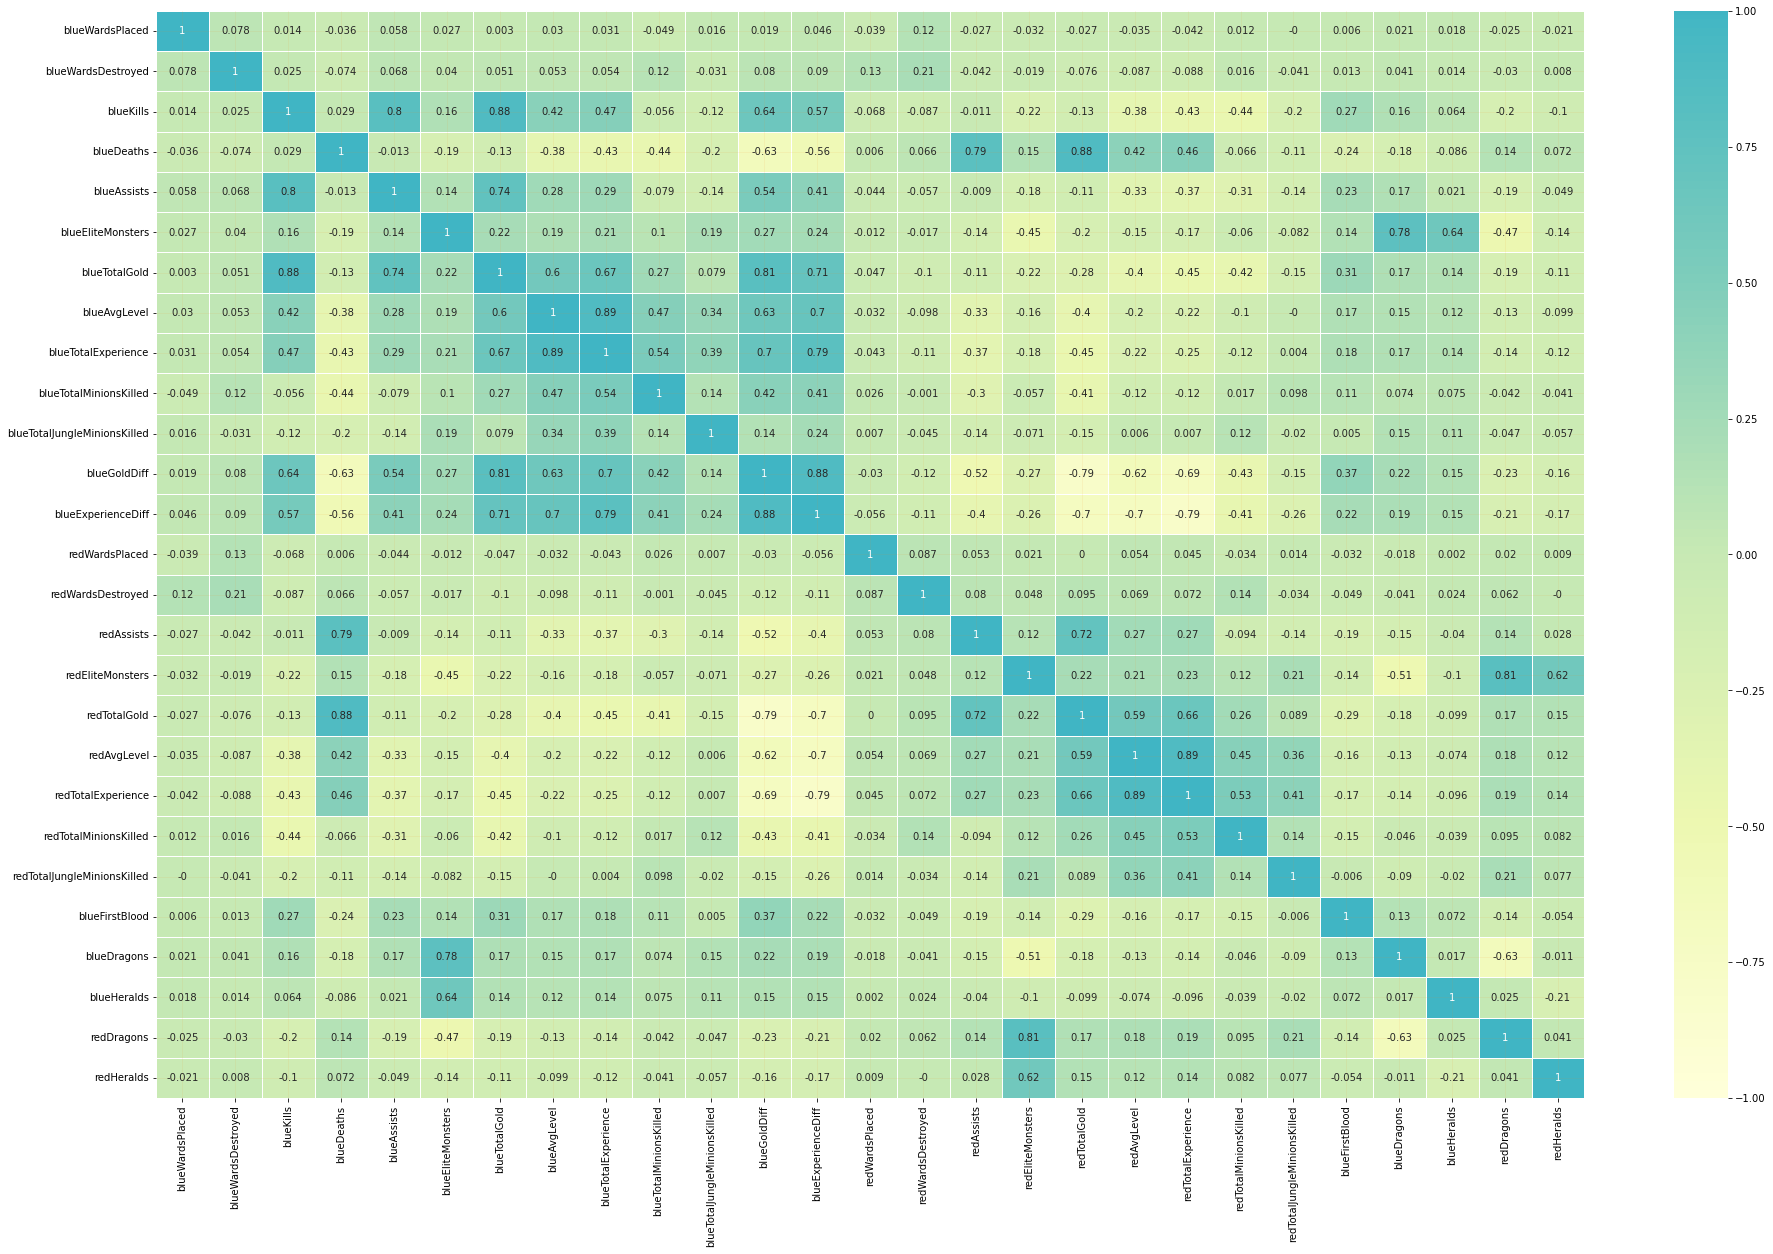

In [103]:
df_X_scaled = pd.DataFrame(
    X_scaled, columns=numerical_columns+categorical_columns)
corr = df_X_scaled.corr()
plt.figure(figsize=(32, 20))

sns.heatmap(round(corr, 3), annot=True, vmin=-1, vmax=1,
            cmap="YlGnBu", linewidths=.5, center=True)
plt.grid(b=True, color='#f68c1f', alpha=0.1)
plt.show()


# PCA (Principle Component Analysis) <a name="5"></a>


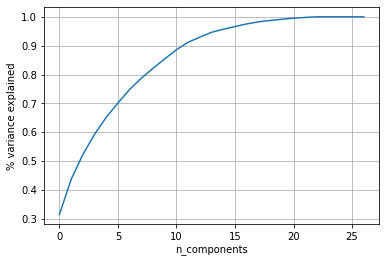

In [104]:
pca = PCA(n_components=X_scaled.shape[1])
pca_data = pca.fit_transform(X_scaled)

percent_var_explained = pca.explained_variance_ / \
    (np.sum(pca.explained_variance_))
cumm_var_explained = np.cumsum(percent_var_explained)

plt.plot(cumm_var_explained)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("% variance explained")
plt.show()


- Dựa trên đồ thị về số component tối ưu cho việc giảm chiều dữ liệu là 20


In [105]:
pca = PCA(n_components=18)


In [106]:
X_pca = pca.fit_transform(X_scaled)
X_pca = pca.transform(X_scaled)


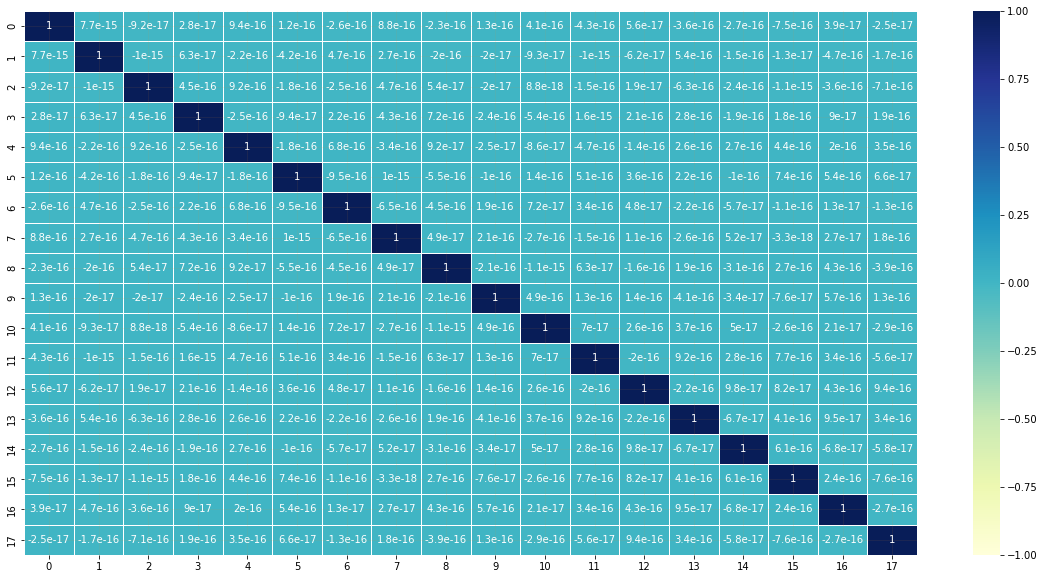

In [107]:
df_X_pca = pd.DataFrame(X_pca)

corr = df_X_pca.corr()
plt.figure(figsize=(20, 10))

sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.5)
plt.grid(b=True, color='#f68c1f', alpha=0.1)
plt.show()


- Sau khi áp dụng PCA ta thấy số chiều dữ liệu giảm từ 29 xuống 17 thuộc tính và các thuộc tính độc lập với nhau.


# Modeling <a name="6"></a>


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25)


# Tối ưu tham số cho model <a name="7"></a>


- Dùng dữ liệu đã được xử lí so sánh trên 3 model:
  - K-nearest neighbor
  - Random Forest
  - Logistic Regression


In [76]:
model_params = {
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [5,10,15]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [5, 10, 20]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [1, 10, 100]
        }
    }
}


In [111]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'],
                       cv=5, return_train_score=False)
    clf.fit(X_pca, y)
    scores.append({

        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df_par = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df_par


,model,best_score,best_params
0,knn,0.700637,{'n_neighbors': 15}
1,random_forest,0.722177,"{'max_depth': 5, 'n_estimators': 100}"
2,logistic_regression,0.723798,{'C': 1}


# Đánh giá mô hình - ROC_AUC <a name="8"></a>


Theo tiêu chuẩn đánh giá thì ta thường hay sử dụng F1-Score nhưng độ đo này bị ảnh hưởng bởi 2 đại lượng $FN$ và $FP$ mà bài toán này chỉ tập trung vào $FP$ khi thực tế đang thua nhưng dự đoán thắng. Điều này ảnh hưởng rất lớn đến chiến thuật của team và khó đưa ra yếu tố quyết định. Nên ta cần độ đo phù hợp là ROC


- ROC (Receiver Operator Characteristic)
  - False Positive Rate : $\frac{FP}{FP+TN}$ tỉ lệ (dự đoán thắng khi thua)/(thua thực tế)
  - True Positive Rate: $\frac{TP}{TP+FN}$ tỉ lệ (dự đoán thắng)/(thắng thực tế)
- AUC (Area Under Curve): Giải thích rằng diện tích của model nào càng lớn model đó càng hiệu quả


In [109]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=10, max_depth=5),
    'Logistic Regression': LogisticRegression(C=10),
    'KNN': KNeighborsClassifier(n_neighbors=500)
}


def plot_roc(models):
    X_train, X_test, y_train, y_test = train_test_split(
        X_pca, y, test_size=0.25, random_state=42)
    ns_probs = [0 for _ in range(len(y_test))]
    ns_auc = roc_auc_score(y_test, ns_probs)
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    plt.figure(figsize=(20, 10))
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No prediction capacity')

    for name, model in models.items():
        # predict probabilities

        model.fit(X_train, y_train)
        lr_probs = model.predict_proba(X_test)
        y_preds = model.predict(X_test)
        # keep probabilities for the positive outcome only
        lr_probs = lr_probs[:, 1]

        lr_auc = roc_auc_score(y_test, lr_probs)
        # summarize scores
        print(f'{name}: ROC AUC=%.3f' % (lr_auc))
        # calculate roc curves
        lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
        # plot the roc curve for the model
        plt.plot(lr_fpr, lr_tpr, marker='.', label=name)

    print('Classifier without prediction capacity: ROC AUC=%.3f' % (ns_auc))

    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()


Random Forest: ROC AUC=0.779
Logistic Regression: ROC AUC=0.806
KNN: ROC AUC=0.801
Classifier without prediction capacity: ROC AUC=0.500


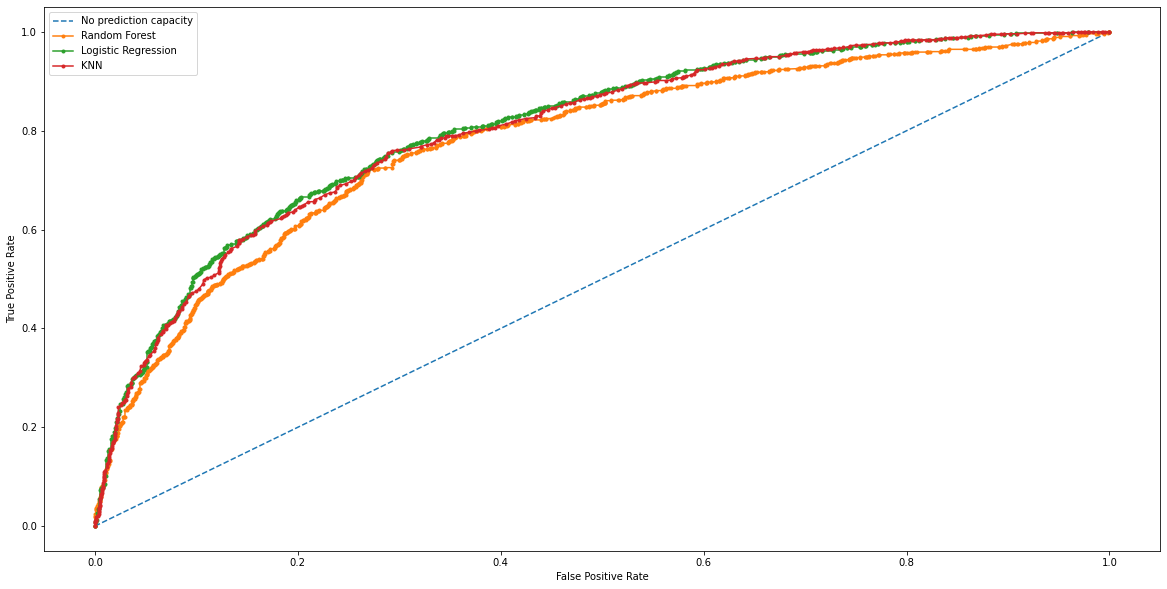

In [110]:
plot_roc(models)


Với ROC_AUC_score = 0.81 ta thấy model Logistic dự đoán hiệu quả hơn 2 model còn lại


# Kết luận <a name="9"></a>


In [ ]:
Yếu tố
